<a href="https://colab.research.google.com/github/Priyanshu-Naik/Gen_AI/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Autoencoders

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from keras.datasets import mnist

Load the MNIST dataset

We will be loading the MNIST dataset which is inbuilt dataset and normalize pixel values to [0,1] also reshape the data to fit the model

In [3]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

X_train = X_train.reshape((len(X_train), 28, 28, 1))
X_test = X_test.reshape((len(X_test), 28, 28, 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Define a basic Autoencoder

Creating a simple autoencoder class with an encoder and decoder using Keras Sequential model.

layers.Input(shape=(28, 28, 1)): Input layer expecting grayscale images of size 28x28.

layers.Dense(latent_dimensions, activation='relu'): Dense layer that compresses the input to the latent space using ReLU activation.

layers.Dense(28 * 28, activation='sigmoid'): Dense layer that expands the latent vector back to the original image size with sigmoid activation.

In [4]:
class SimpleAutoencoder(Model):
    def __init__(self, latent_dimensions):
        super(SimpleAutoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28, 28, 1)),
            layers.Flatten(),
            layers.Dense(latent_dimensions, activation='relu')
        ])

        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28, 28, 1))
        ])

    def call(self, input_data):
      encoded = self.encoder(input_data)
      decoded = self.decoder(encoded)
      return decoded

Compiling and Fitting Autoencoder

Here we compile the model using Adam optimizer and Mean Squared Error loss also we train for 10 epochs with batch size 256.

latent_dimensions = 64: Sets the size of the compressed latent space to 64.

In [5]:
latent_dimensions = 64
autoencoder = SimpleAutoencoder(latent_dimensions)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder.fit(X_train, X_train, epochs=10, batch_size = 256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0960 - val_loss: 0.0325
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0292 - val_loss: 0.0208
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0196 - val_loss: 0.0152
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0146 - val_loss: 0.0117
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0114 - val_loss: 0.0094
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0092 - val_loss: 0.0077
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0077 - val_loss: 0.0067
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0067 - val_loss: 0.0059
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0060 - val_loss: 0.0054
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0055 - val_loss: 0.0051


Visualize original and reconstructed data

Now compare original images and their reconstructions from the autoencoder.

encoded_imgs = autoencoder.encoder(x_test).numpy(): Passes test images through the encoder to get their compressed latent representations as NumPy arrays.

decoded_imgs = autoencoder.decoder(encoded_imgs).numpy(): Reconstructs images by passing the latent representations through the decoder and converts them to NumPy arrays.

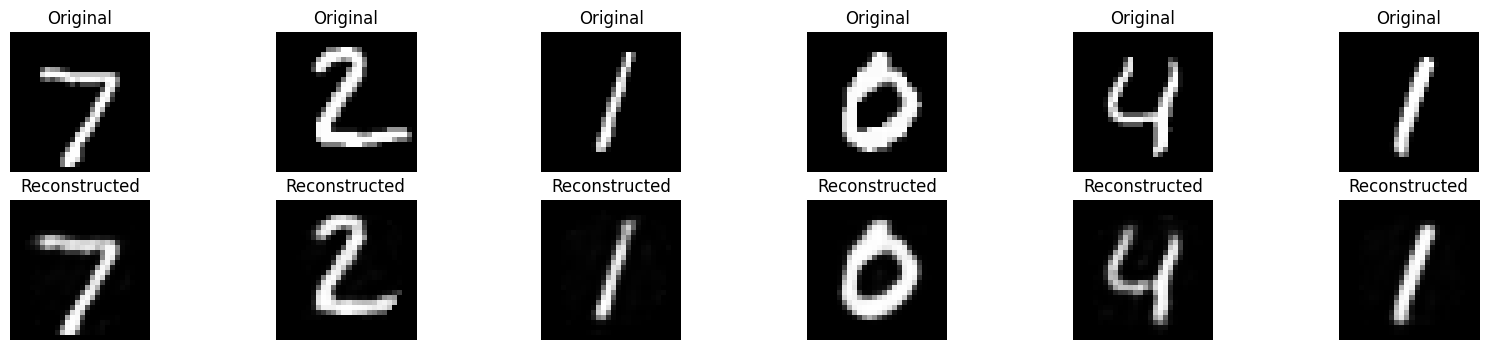

In [6]:
encoded_imgs = autoencoder.encoder(X_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 6
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
  plt.title("Original")
  plt.axis("off")

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
  plt.title("Reconstructed")
  plt.axis("off")